# W&B Example: Log Tables Incrementally

As you log more and more data to a Table over time, log incrementally to the same table using the pattern below. You will see each version logged as a new artifact, but data is deduplicated and shared between versions, meaning that we minimize redundant upload and storage. The final artifact version will contain the ultimate table, with all the data concatenated together.

<a href="https://colab.research.google.com/github/wandb/examples/blob/master/tables/Log_Tables_Incrementally.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb -qqq

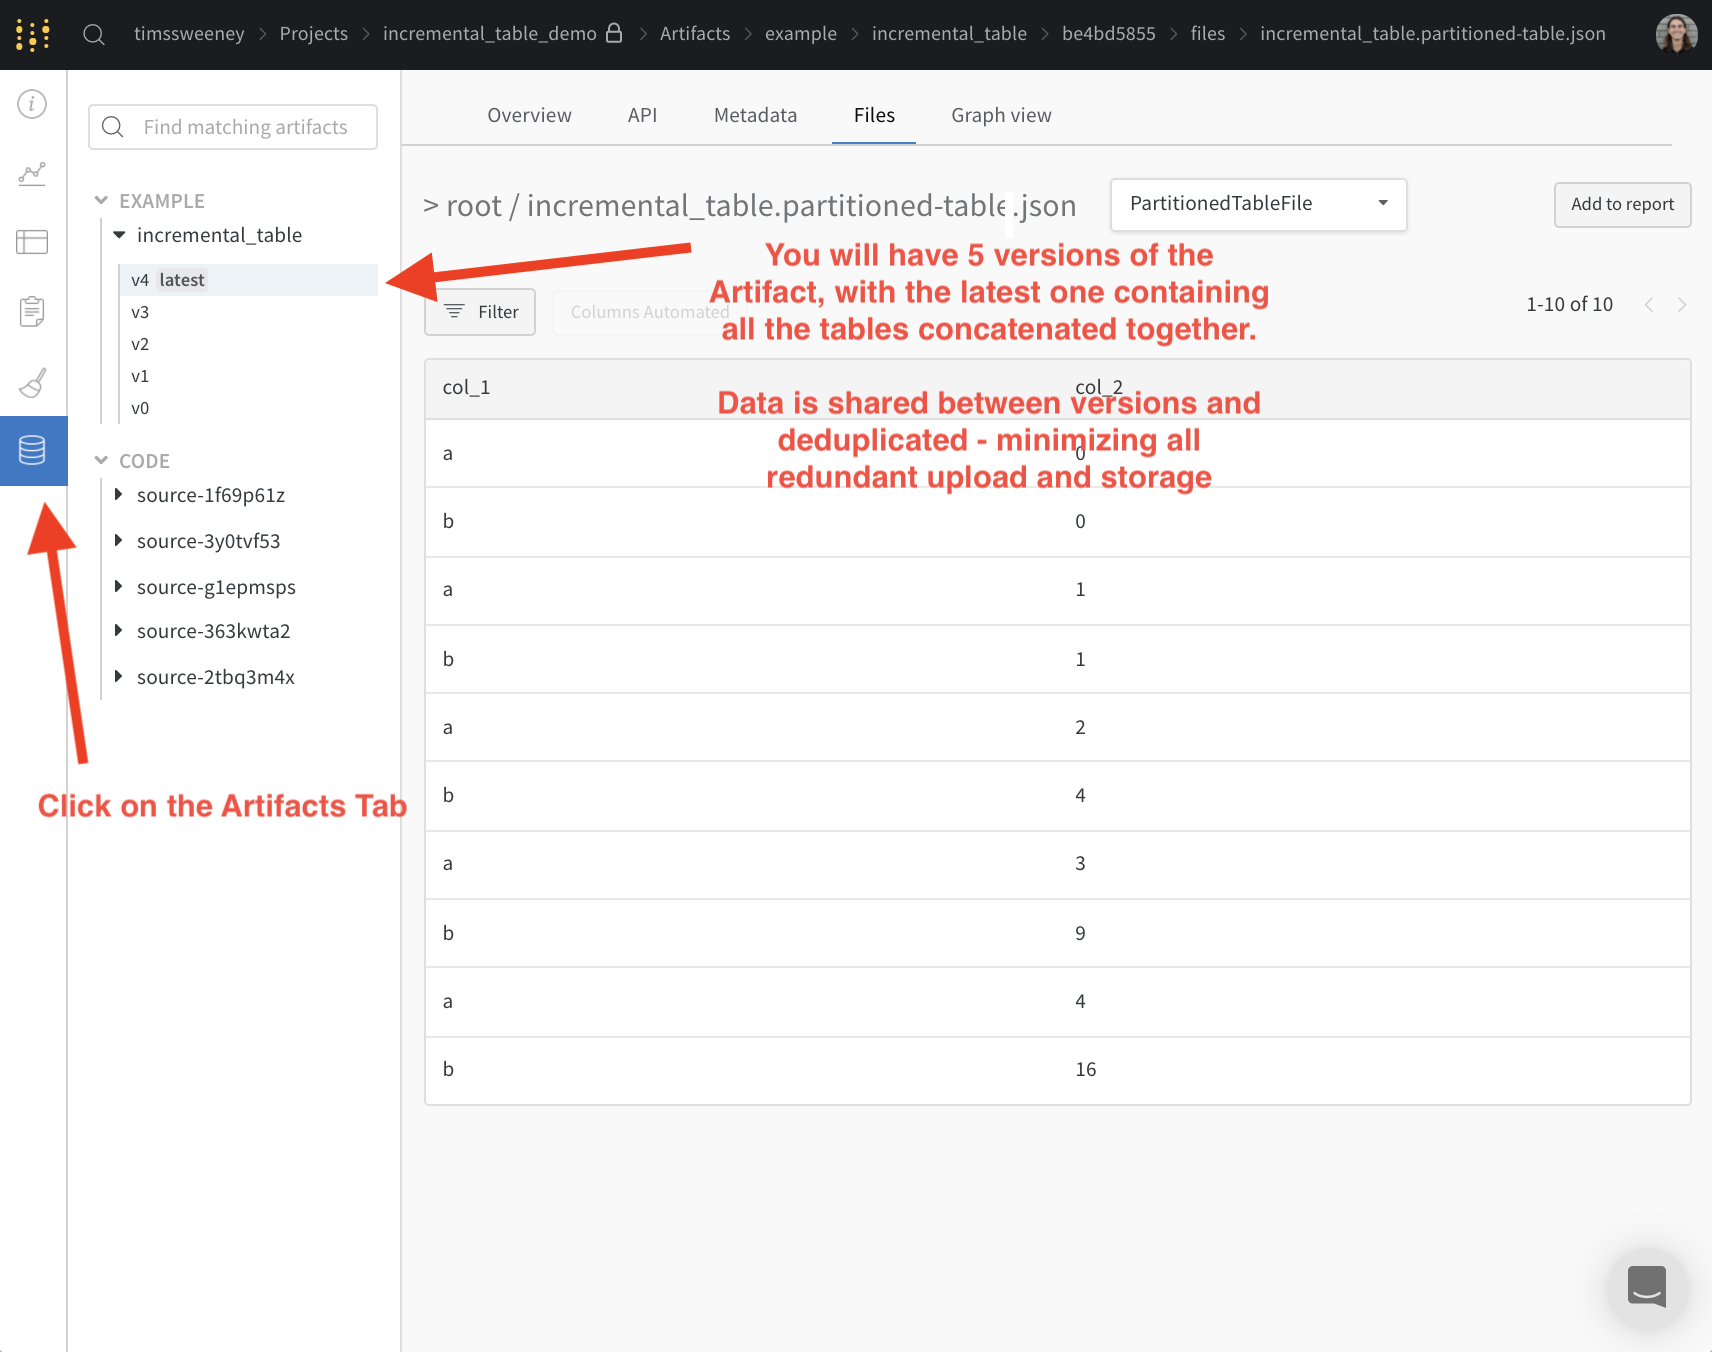

In [ ]:
import wandb

PROJECT_NAME = "incremental_table_demo"
TABLE_NAME = "incremental_table"
TABLE_COLUMNS = ["col_1", "col_2"]

# Let's build up a table over 5 runs
for i in range(5):
  # Create a new run
  run = wandb.init(project=PROJECT_NAME)

  # Create an artifact to hold the partitioned table
  # Setting `incremental=True` allows you to append to the last version 
  # of the artifact without downloading everything locally
  art = wandb.Artifact(TABLE_NAME, "example", incremental=True)

  # Create a Partitioned Table pointing to a directory in the artifact (only
  # need to do this once)
  if i == 0:
    parts_dir = "{}_parts".format(TABLE_NAME)
    tab = wandb.data_types.PartitionedTable(parts_dir)
    art.add(tab, TABLE_NAME)

  # Create the table, and add it to the artifact
  sub_tab = wandb.Table(data=[["a", i], ["b", i**2]], columns=TABLE_COLUMNS)
  tab_path = "{}/tab_{}".format(parts_dir, i)
  art.add(sub_tab, tab_path)
  
  # Log the artifact
  run.log_artifact(art)

  # Finish the run
  run.finish()